In [30]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

url= "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
titanic = pd.read_csv(url)

print(titanic.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


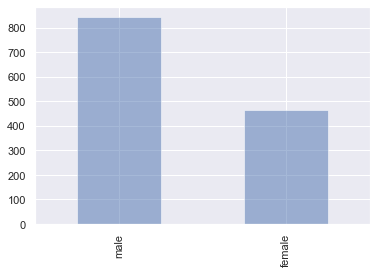

In [31]:
sns.set()
titanic.sex.value_counts().plot(kind="bar",alpha=0.5)

C:\Users\Ashwin Anil\Anaconda 3 Actual\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



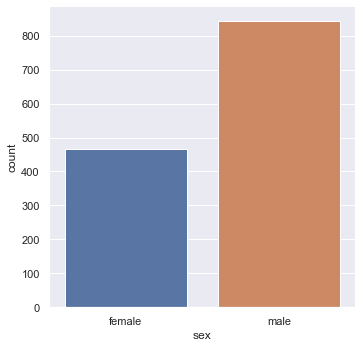

In [32]:
sns.factorplot('sex',data=titanic,kind='count')

In [37]:
print((titanic.sex=='male').value_counts())

True     843
False    467
Name: sex, dtype: int64


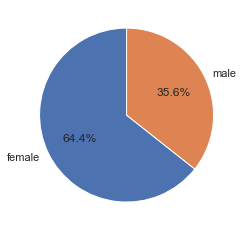

In [46]:
plt.pie([843, 467], labels = ['male', 'female'], startangle=90, autopct='%.1f%%')
plt.show()

In [47]:
print(titanic.head())

   pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St 

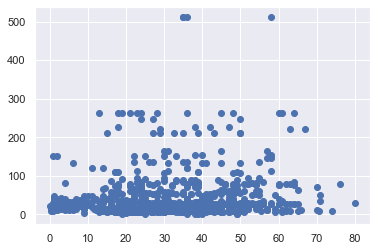

In [51]:
plt.scatter(titanic.age, titanic.fare)

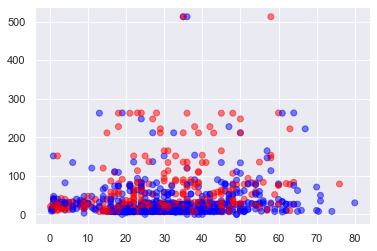

In [53]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))

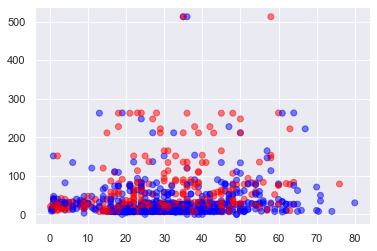

In [54]:
titanic = titanic.dropna(subset=['sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=titanic['sex'].map(mapping))

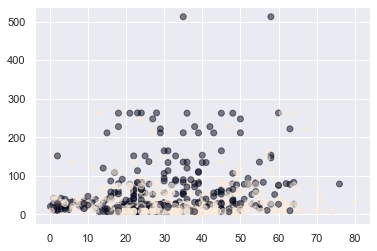

In [55]:
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5, c=pd.factorize(titanic['sex'])[0])

In [2]:
import pandas as pd
import numpy as np
import re

df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN','londON_StockhOlm','Budapest_PaRis', 'Brussels_londOn'], 'FlightNumber': [10045, np.nan, 10065, np.nan, 10085], 'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]], 'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', '12. Air France', '"Swiss Air"']})
print(df.head())


            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris       10045.0      [23, 47]               KLM(!)
1      MAdrid_miLAN           NaN            []    <Air France> (12)
2  londON_StockhOlm       10065.0  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis           NaN          [13]       12. Air France
4   Brussels_londOn       10085.0      [67, 32]          "Swiss Air"


In [3]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
print(df.head())

            From_To  FlightNumber  RecentDelays              Airline
0      LoNDon_paris         10045      [23, 47]               KLM(!)
1      MAdrid_miLAN         10055            []    <Air France> (12)
2  londON_StockhOlm         10065  [24, 43, 87]  (British Airways. )
3    Budapest_PaRis         10075          [13]       12. Air France
4   Brussels_londOn         10085      [67, 32]          "Swiss Air"


In [4]:
tempdf = pd.DataFrame()
tempdf['From'] = df['From_To'].str.split('_').str[0].str.capitalize()
tempdf['To'] = df['From_To'].str.split('_').str[1].str.capitalize()
df.pop('From_To')
df.insert(loc = 1, column = "From", value = tempdf['From'])
df.insert(loc = 2,column = "To", value = tempdf['To'])
print(df.head())

   FlightNumber      From         To  RecentDelays              Airline
0         10045    London      Paris      [23, 47]               KLM(!)
1         10055    Madrid      Milan            []    <Air France> (12)
2         10065    London  Stockholm  [24, 43, 87]  (British Airways. )
3         10075  Budapest      Paris          [13]       12. Air France
4         10085  Brussels     London      [67, 32]          "Swiss Air"


In [5]:
delays = pd.DataFrame(df.RecentDelays.values.tolist())
delays.columns = ['delay_1', 'delay_2', 'delay_3']
df.pop('RecentDelays')
df.insert(loc = 3, column = "delay_1", value = delays['delay_1'])
df.insert(loc = 4, column = "delay_2", value = delays['delay_2'])
df.insert(loc = 5, column = "delay_3", value = delays['delay_3'])
print(df.head())

   FlightNumber      From         To  delay_1  delay_2  delay_3  \
0         10045    London      Paris     23.0     47.0      NaN   
1         10055    Madrid      Milan      NaN      NaN      NaN   
2         10065    London  Stockholm     24.0     43.0     87.0   
3         10075  Budapest      Paris     13.0      NaN      NaN   
4         10085  Brussels     London     67.0     32.0      NaN   

               Airline  
0               KLM(!)  
1    <Air France> (12)  
2  (British Airways. )  
3       12. Air France  
4          "Swiss Air"  


In [6]:
df['Airline'] = df['Airline'].apply(lambda x: re.sub(r"[\d,@)\"(?\.$%_<>!]", '', x))
df.style.set_properties(**{'text-align': 'left'})
print(df.head())

   FlightNumber      From         To  delay_1  delay_2  delay_3  \
0         10045    London      Paris     23.0     47.0      NaN   
1         10055    Madrid      Milan      NaN      NaN      NaN   
2         10065    London  Stockholm     24.0     43.0     87.0   
3         10075  Budapest      Paris     13.0      NaN      NaN   
4         10085  Brussels     London     67.0     32.0      NaN   

            Airline  
0               KLM  
1       Air France   
2  British Airways   
3        Air France  
4         Swiss Air  
